In [245]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import cycle
from matplotlib.ticker import FuncFormatter



In [246]:
NEURAL_NETWORKS = [ 'DenseNet201',
                    'MobileNetV2',
                    'InceptionV3', 
                    "ResNet50", 
                    'GradientBoosting', 
                    'KNN', 
                    'NBayes', 
                    "RandomForest",
                    'f_GradientBoosting', 
                    'f_KNN', 
                    'f_NBayes', 
                    "f_RandomForest"]
pre_name = "ml_dl_f"
path_project = Path().absolute().parent.parent.parent
results_path = path_project / "6_resultados"


In [247]:
main_pd = pd.DataFrame()
pds = []
for network in NEURAL_NETWORKS:
    output_file = results_path / 'analitycs' / 'by_train' / '_pre_plot' / f'{network}_result_for_analytic.csv'
    readed = pd.read_csv(output_file)
    pds.append(readed)

main_pd = pd.concat(pds)
NEURAL_NETWORKS = main_pd['model'].unique()

print(NEURAL_NETWORKS)

['DenseNet201' 'MobileNetV2' 'InceptionV3' 'ResNet50' 'GradientBoosting'
 'KNN' 'NBayes' 'RandomForest' 'f_GradientBoosting' 'f_KNN' 'f_NBayes'
 'f_RandomForest']


In [248]:
main_pd

print(main_pd['val_accuracy_mean'].max())

98.82622915506364


In [249]:

# Combinando todos os valores de ROIs
full_rois = np.unique(np.concatenate([main_pd['subset']]))
range_rois =  np.arange(0, 100, 10)
range_rois = np.append(range_rois, 100)



print(range_rois)


[  0  10  20  30  40  50  60  70  80  90 100]


In [250]:
from matplotlib.ticker import FuncFormatter

def plot_comparison(main_pd, attribute, attribute_title, title, xlabel, xticks, figsize=(7, 3), yticks=None, legend_per_row=6):
    """
    Função para plotar comparações de um atributo específico entre diferentes arquiteturas de CNN.
    Também exporta os dados para arquivos .dat para cada métrica.

    :param main_pd: DataFrame contendo todos os dados.
    :param attribute: Atributo a ser plotado (string).
    :param title: Título do gráfico.
    :param xlabel: Rótulo do eixo X.
    :param xticks: Marcas do eixo X.
    :param figsize: Tamanho da figura do gráfico.
    :param yticks: Marcas do eixo Y (opcional).
    :param legend_per_row: Número de legendas por linha na legenda.
    """
    
    # Definir os grupos e suas cores (mesmo esquema de cores usado no boxplot)
    color_map = {
        'InceptionV3': '#1f77b4',      
        'MobileNetV2': '#1f77b4',      
        'DenseNet201': '#1f77b4',      
        'ResNet50': '#1f77b4',         
        'KNN': '#ff7f0e',              
        'RandomForest': '#ff7f0e',     
        'NBayes': '#ff7f0e',           
        'GradientBoosting': '#ff7f0e',
        'f_KNN': '#2ca02c',            
        'f_NBayes': '#2ca02c',         
        'f_RandomForest': '#2ca02c',   
        'f_GradientBoosting': '#2ca02c'
    }

    # Definir marcadores
    markers = ['o', 's', 'D', '^', 'v', 'P', 'X', 'p', '*', 'h', 'H', 'd']
    marker_iter = iter(markers)

    # Configurar figura
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(font_scale=1.2)
    sns.set_style("whitegrid")
    sns.set_palette("husl")
    sns.despine()

    # Iterar sobre as redes (NEURAL_NETWORKS) e plotar os dados com as cores dos grupos
    for network in NEURAL_NETWORKS:
        network_data = main_pd[main_pd['model'] == network]
        x = network_data['subset']
        y = network_data[attribute]
        marker = next(marker_iter)
        
        # Plotar cada linha de rede
        ax.plot(x, y, label=network, marker=marker, linestyle='--', linewidth=2.5, markersize=8, color=color_map[network])

    # Configurações de título, eixos e ticks
    ax.set_title(title, fontsize=14, pad=10)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(attribute_title, fontsize=16)

    ax.set_xticks(xticks)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x}%'))  # Adiciona "%" aos valores

    # Inverter o eixo X para começar do maior valor (100%)
    ax.invert_xaxis()

    # Ajustar automaticamente as margens para evitar corte
    plt.tight_layout()
    if yticks is None:
        min_value = main_pd[attribute].min()
        max_value = main_pd[attribute].max()
        yticks = np.round(np.linspace(min_value, max_value, num=10), 2)
        ax.set_yticks(yticks)
    else:
        ax.set_yticks(yticks)
        
    # Linhas de grade suaves
    ax.grid(True, which='major', linestyle='--', linewidth=1.0, alpha=0.9)

    # Legenda organizada abaixo do gráfico
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, bbox_to_anchor=(0.5, -0.1), loc='upper center', fontsize='small', 
              title_fontsize='small', ncol=legend_per_row, labelspacing=0.2, handletextpad=0.1,
              columnspacing=1.0, borderpad=0.5, frameon=False)

    # Ajustar automaticamente as margens para que o gráfico ocupe mais espaço
    plt.subplots_adjust(top=1.6, bottom=0.25, left=0.1, right=1.5, hspace=0.8, wspace=0.8)
    
    # Verifica se a pasta de gráficos existe, senão cria
    graphics_path = results_path / 'analitycs' / 'by_train' / 'graphics'
    if not os.path.exists(graphics_path):
        os.makedirs(graphics_path)
   
    plt.savefig(graphics_path / f"{pre_name}_{attribute}.svg", format='svg', dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()


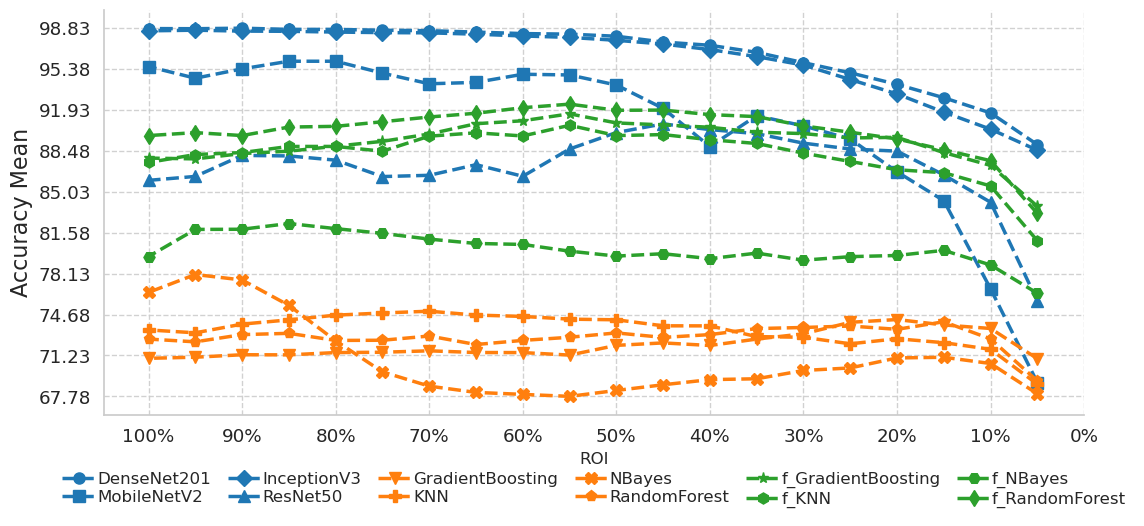

In [251]:
plot_comparison(main_pd, 'val_accuracy_mean', 'Accuracy Mean','', 'ROI', range_rois)

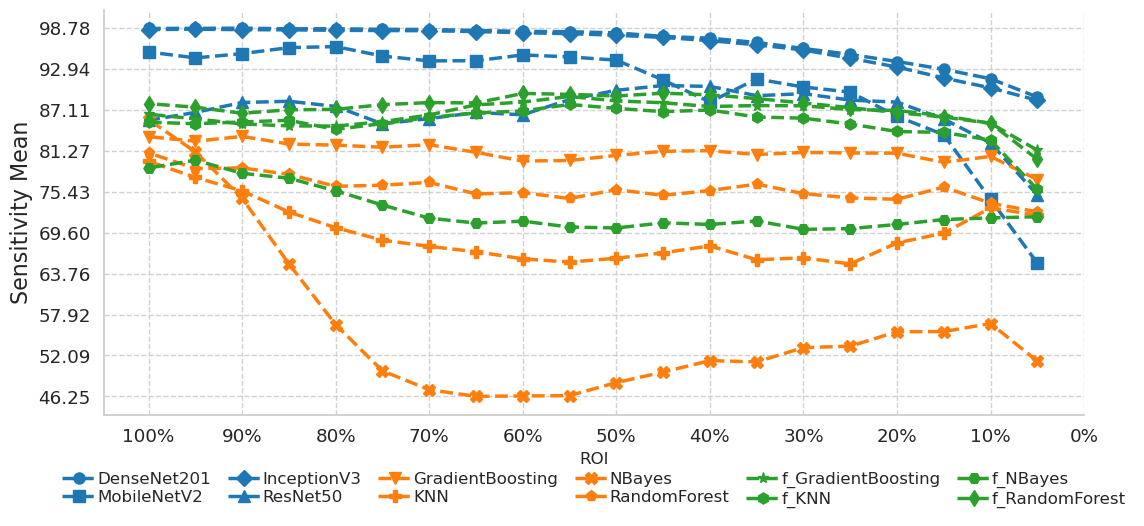

In [252]:
plot_comparison(main_pd, 'val_sensitivity_mean', 'Sensitivity Mean','', 'ROI', range_rois)

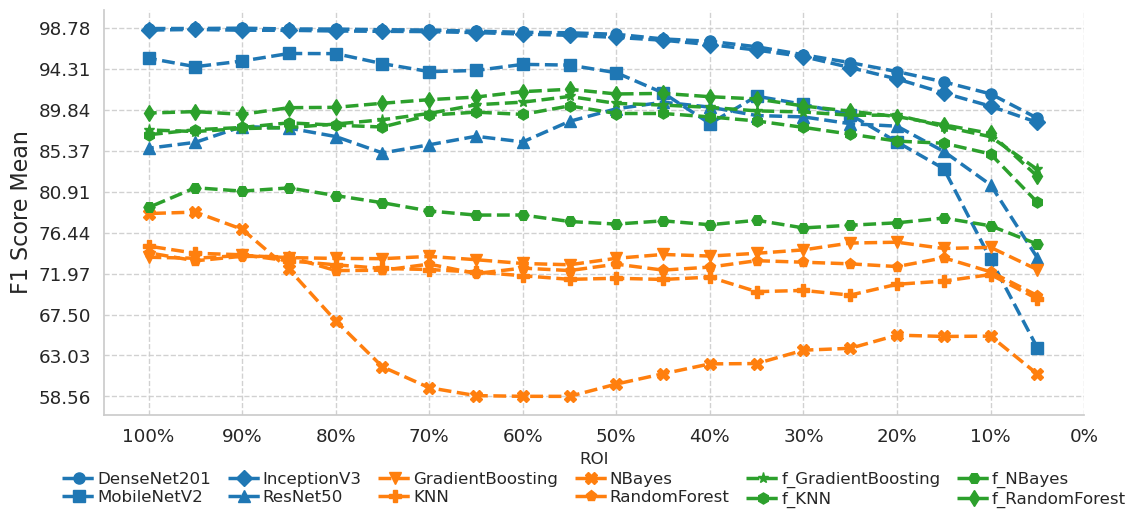

In [253]:
plot_comparison(main_pd, 'val_f1_score_mean', 'F1 Score Mean','', 'ROI', range_rois)


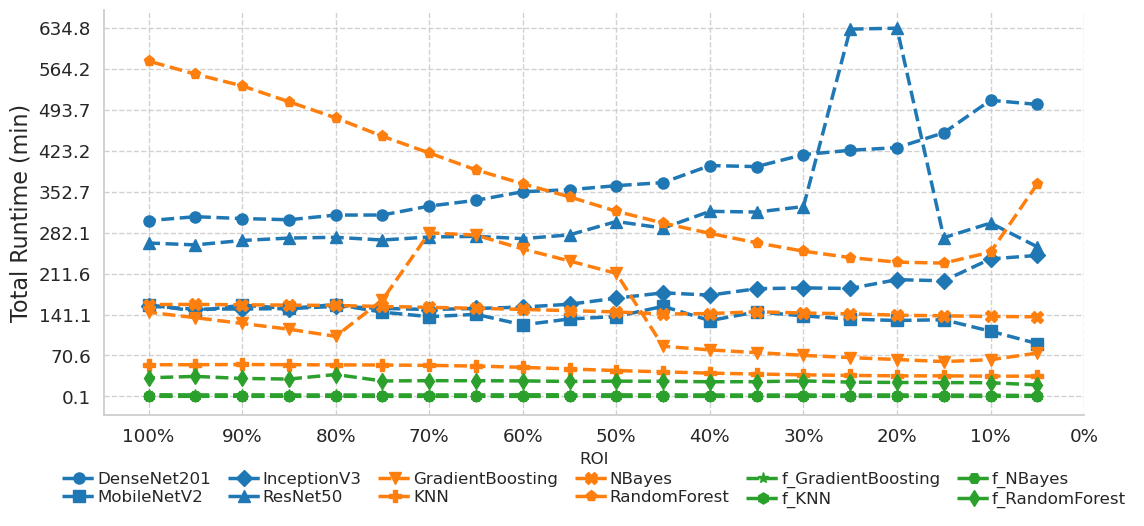

In [254]:
# Valores para os ticks do eixo Y
range_time = np.arange(40, 360, 30)

plot_comparison(main_pd, 'total_runtime', 'Total Runtime (min)', '', 'ROI', range_rois, legend_per_row=6)


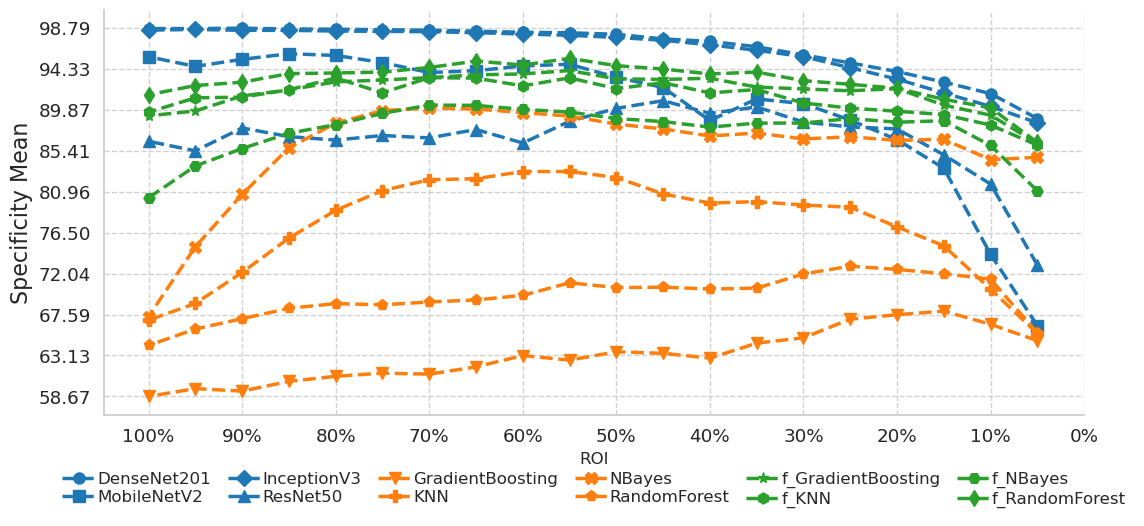

In [255]:

plot_comparison(main_pd, 'val_specificity_mean', "Specificity Mean",'', 'ROI', range_rois)


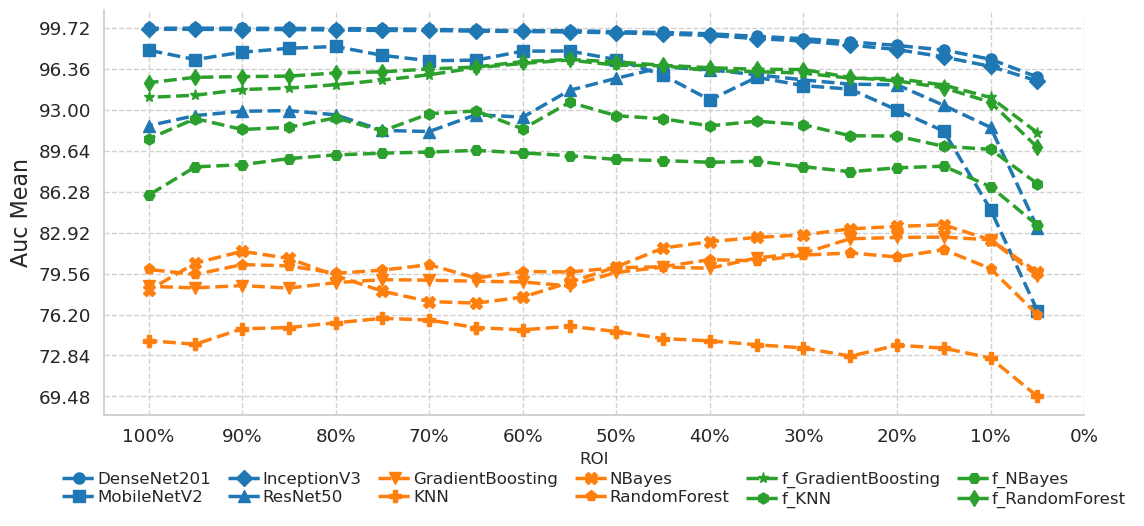

In [256]:
plot_comparison(main_pd, 'val_auc_mean', 'Auc Mean','', 'ROI', range_rois)


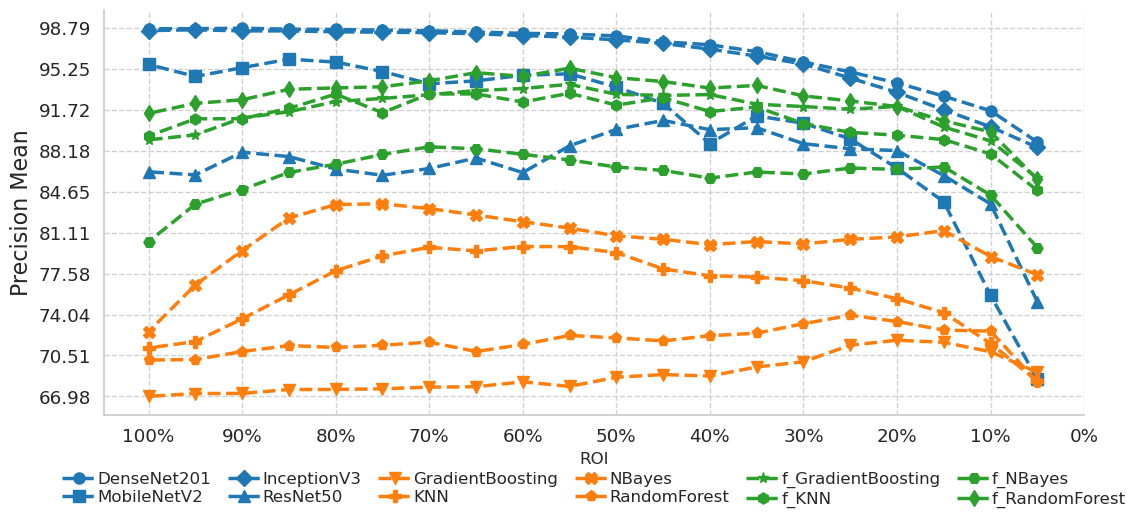

In [257]:
plot_comparison(main_pd, 'val_precision_mean', 'Precision Mean','', 'ROI', range_rois)

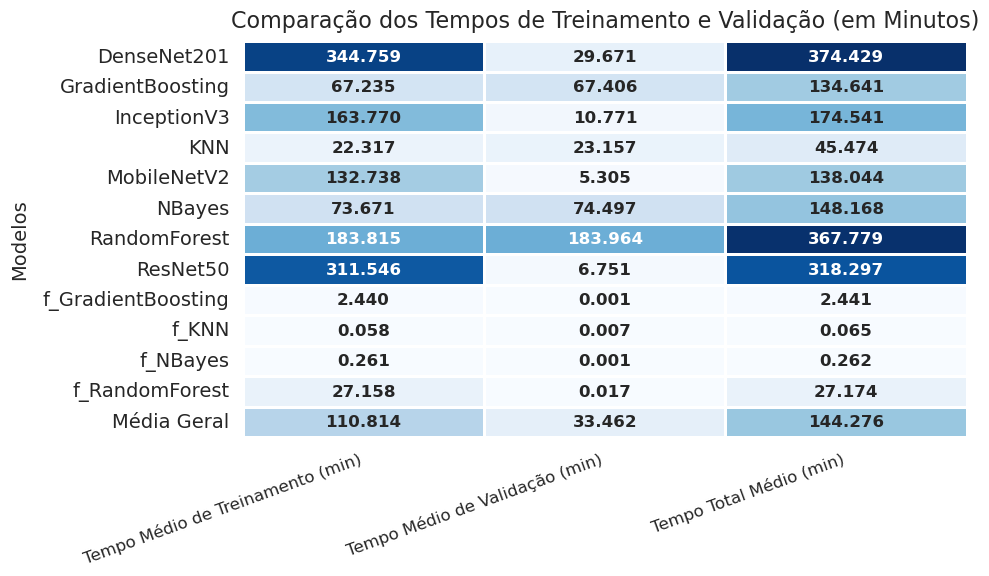

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Calcular tempo médio para treinamento, validação e tempo total (em minutos)
train_time = (main_pd.groupby('model')['total_runtime'].mean() - main_pd.groupby('model')['val_runtime'].mean()).round(3)
val_time = main_pd.groupby('model')['val_runtime'].mean().round(3)
total_time = main_pd.groupby('model')['total_runtime'].mean().round(3)

# Calcular médias gerais
avg_train_time = train_time.mean().round(3)
avg_val_time = val_time.mean().round(3)
avg_total_time = total_time.mean().round(3)

# Criar a tabela de comparação
time_comparison = pd.concat([train_time, val_time, total_time], axis=1)
time_comparison.columns = [
    'Tempo Médio de Treinamento (min)',
    'Tempo Médio de Validação (min)',
    'Tempo Total Médio (min)'
]

# Adicionar uma linha com a média geral
time_comparison.loc['Média Geral'] = [
    avg_train_time,
    avg_val_time,
    avg_total_time
]

# Melhorar a visualização
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Heatmap com cores suaves e anotações
heatmap = sns.heatmap(
    time_comparison,
    annot=True,
    fmt=".3f",
    cmap='Blues',
    linewidths=1,
    cbar=False,
    linecolor='white',
    annot_kws={"size": 12, "weight": "bold"},
    square=False,
    robust=True
)

# Ajustar rótulos dos eixos
heatmap.set_title('Comparação dos Tempos de Treinamento e Validação (em Minutos)', fontsize=16, pad=10)
heatmap.set_ylabel('Modelos', fontsize=14, labelpad=10)  # Definir o rótulo do eixo Y como "Modelos"

# Rotacionar os rótulos do eixo X e ajustar o eixo Y
plt.xticks(rotation=20, ha='right', fontsize=12)
plt.yticks(fontsize=14)
plt.tight_layout()

# Verificar e criar o diretório para salvar o gráfico
graphics_path = results_path / 'analitycs' / 'by_train' / 'graphics'
os.makedirs(graphics_path, exist_ok=True)

# Salvar a figura
plt.savefig(graphics_path / f'{pre_name}_time_comparison.svg', format='svg', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Exibir o gráfico
plt.show()

